In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
rawData = pd.read_csv('dataset1.csv')
rawData.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [ ]:
rawData.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


In [ ]:
rawData.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [ ]:
rawData['Output'].value_counts()
# 0 describes low-fertility
# 1 describes medium-fertility
# 2 describes high-fertility

,count
Output,
1,440
0,401
2,39


In [ ]:
rawDataCopy = rawData.copy()
rawDataCopy.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [ ]:
corr = rawDataCopy.corr()


<Axes: >

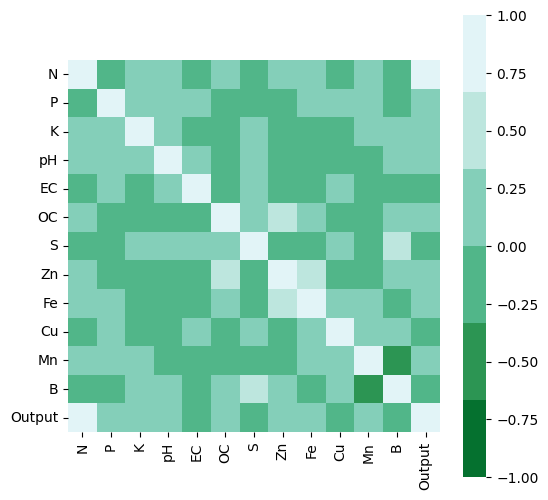

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.color_palette("BuGn_r"),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)


In [ ]:
labels = rawDataCopy[['Output']]
features = rawDataCopy.drop('Output', axis=1)

In [ ]:
features.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26


In [ ]:
labels.head()

,Output
0,0
1,0
2,0
3,0
4,1


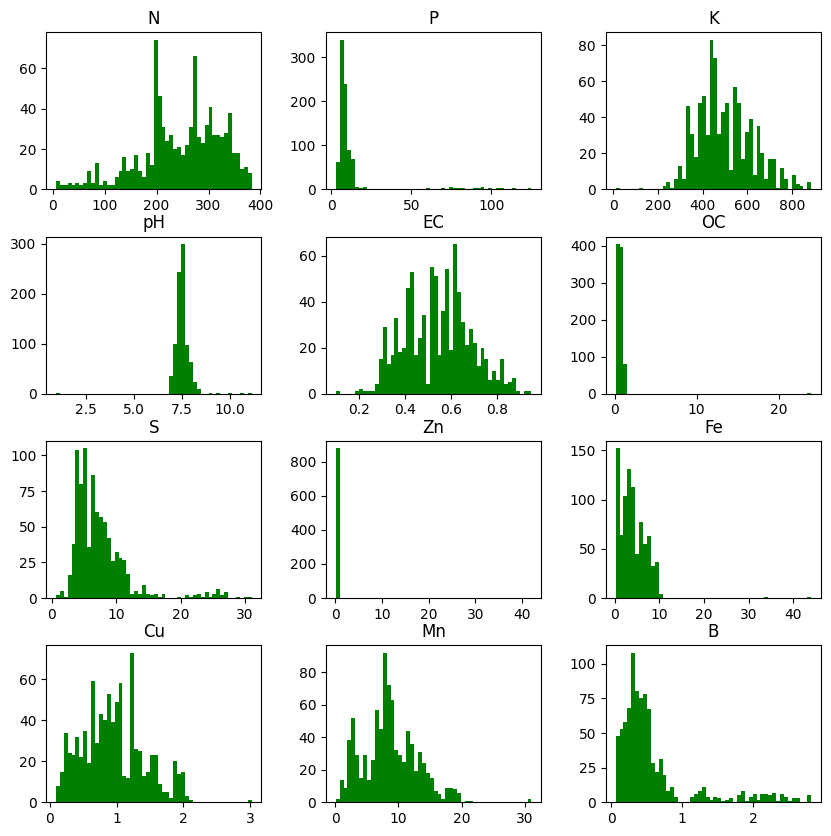

In [ ]:
features.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

In [ ]:
transformedFeatures = features.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

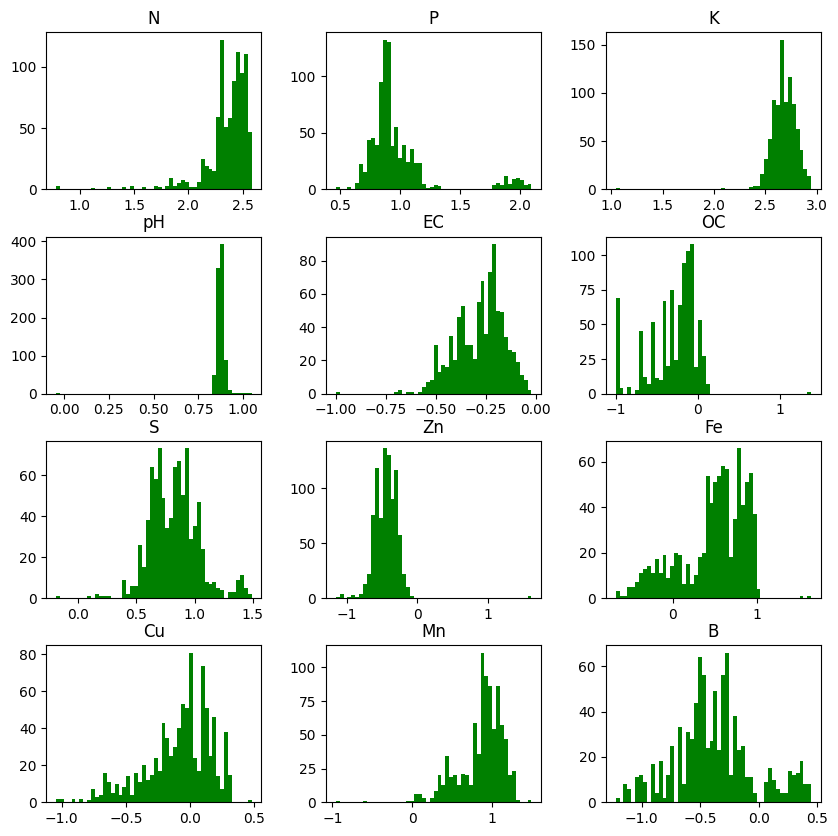

In [ ]:
transformedFeatures.hist(bins=50, figsize=(10, 10), color='green', grid=False)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

trainInput, validationInput, trainTarget, validationTarget = train_test_split(transformedFeatures, labels, test_size = 0.2, shuffle=True, random_state = 42)
print("Train Data Shape: ", trainInput.shape)

Train Data Shape:  (704, 12)


In [ ]:
trainTarget = trainTarget.values.ravel()

In [ ]:
svcClf = SVC()
svcClf.fit(trainInput, trainTarget)

SVC()

In [ ]:
forestClf = ensemble.RandomForestClassifier()
forestClf.fit(trainInput, trainTarget)

RandomForestClassifier()

In [ ]:
nbClf = GaussianNB()
nbClf.fit(trainInput, trainTarget)

GaussianNB()

In [ ]:
knnClf = KNeighborsClassifier()
knnClf.fit(trainInput, trainTarget)

KNeighborsClassifier()

In [ ]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(trainInput, trainTarget)

DecisionTreeClassifier()

SVC  accuarcy is  0.7897727272727273
RandomForestClassifier  accuarcy is  0.8636363636363636
GaussianNB  accuarcy is  0.5795454545454546
KNeighborsClassifier  accuarcy is  0.7329545454545454
DecisionTreeClassifier  accuarcy is  0.8465909090909091


<Axes: >

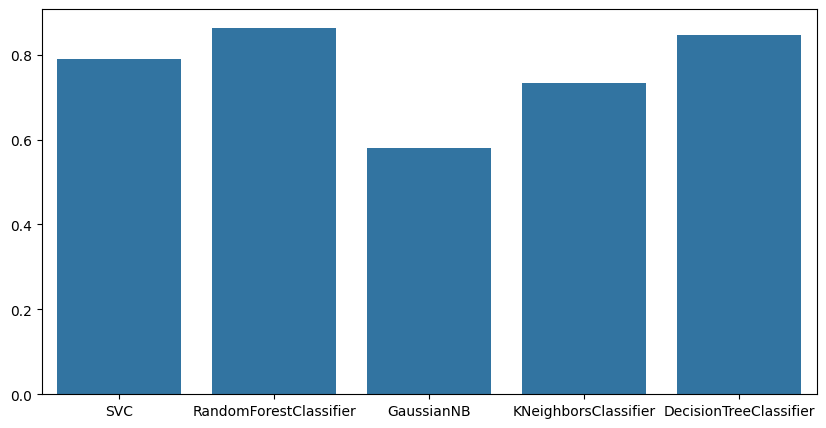

In [ ]:
models = [svcClf, forestClf, nbClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict((validationInput))
    model_acc = accuracy_score(validationTarget, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x = titles, y=accs)


In [ ]:
forestClassifier = ensemble.RandomForestClassifier(random_state=42)


In [ ]:
import pandas as pd

# Update this path based on your environment
df = pd.read_csv('dataset1.csv')  # or /kaggle/input/soil-fertility-dataset/dataset1.csv
print(df.columns)

# Rename "Output" to "fertility" for clarity
df.rename(columns={"Output": "fertility"}, inplace=True)


Index(['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B',
       'Output'],
      dtype='object')


In [ ]:
import numpy as np

# Drop NaNs if any
df.dropna(inplace=True)

# Separate features and target
X = df.drop("fertility", axis=1)
y = df["fertility"]

# Optional: log transform to normalize skew
X_log = X.applymap(lambda x: np.log10(x + 1))  # avoid log(0)


/tmp/ipython-input-35-4163658929.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_log = X.applymap(lambda x: np.log10(x + 1))  # avoid log(0)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_log, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 10],
    'max_features': ['sqrt'],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8863636363636364
Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        80
           1       0.86      0.94      0.90        88
           2       0.00      0.00      0.00         8

    accuracy                           0.89       176
   macro avg       0.59      0.62      0.60       176
weighted avg       0.85      0.89      0.87       176



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pickle

with open("soil_fertility_model.pkl", "wb") as f:
    pickle.dump(best_model, f)


In [ ]:
randomForestModel.predict([[370, 22.0, 850, 7.4, 0.7, 1.8, 30.0, 1.2, 8.0, 3.0, 25.0, 2.8]])



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])